In [ ]:
#| default_exp ml_classification

# Water pixels classification

Steps :
1. Collect water pixels into table (consider negative buffer for mroe accuracy)  
2. consider - filter pixels based on the values I found in task 2  
3. create dataframe  
4. split x,y,train,test and train model  
5. evaluate the model

In [1]:
#|hide
from nbdev.showdoc import *

In [2]:
#|export
#|hide

import rasterio
import numpy as np
import pandas as pd
# import geopandas as gpd
# import matplotlib.pyplot as plt


from flood_exercise import utils_func
from flood_exercise import const_vals as CONST

C:\Users\USER\AppData\Local\Temp\ipykernel_1244\350017050.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [13]:
#|export

class classification_pixels():
  
  def __init__(self,
               path_labels_str : str , #path to the labeled images
               path_imgs_str : str , #path to S2 images to be used for train
               ):
    
    self.path_labels = utils_func.load_list_paths(path = path_labels_str , filter_file = True)
    self.path_imgs = utils_func.load_list_paths(path = path_imgs_str , filter_file= True)

    dfs_pixels = []
    for label_path in self.path_labels:
      id_path = label_path.split(CONST.SPLIT_TILES_NAMES_STR1)[-1].split(CONST.SPLIT_TILES_NAMES_STR2)[1]
      
      #find the matching S2 image
      s2_img_path = [x for x in self.path_imgs if id_path in x]
      
      if len(s2_img_path)==1:

        s2_img = rasterio.open(s2_img_path[0]).read()
        cols = rasterio.open(s2_img_path[0]).descriptions + rasterio.open(label_path).descriptions
        label_img = rasterio.open(label_path).read()
        

        # Stack the imags 
        stacked_img = np.concatenate((s2_img, label_img), axis=0)
        
        df_pixels = pd.DataFrame(stacked_img.reshape([stacked_img.shape[0],-1]).T)
        df_pixels.columns = cols
        dfs_pixels.append(df_pixels)

      else:
        continue

    self.df_res = pd.concat(dfs_pixels)

    

In [16]:
instance = classification_pixels(path_imgs_str=r"D:\git\flood_exercise\S2",
                                 path_labels_str=r"D:\git\flood_exercise\S2_HANDLABELED")
instance.df_res

In [12]:
pd.DataFrame(test.reshape([test.shape[0],-1]).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1375,1238,1209,1385,1585,1926,2209,2252,2543,789,14,3176,2149,0
1,1375,1238,1209,1385,1585,1926,2209,2252,2543,789,14,3176,2149,0
2,1375,1211,1191,1333,1588,1943,2227,2268,2567,789,14,3160,2144,0
3,1375,1205,1176,1337,1588,1943,2227,2265,2567,789,14,3160,2144,0
4,1408,1255,1201,1400,1635,1961,2238,2263,2570,801,15,3241,2210,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262139,1178,1180,1213,1120,1399,2637,2967,2829,3350,1006,12,2224,1241,0
262140,1178,1121,1148,976,1427,2444,3041,2860,3306,1006,12,2264,1325,0
262141,1178,1097,1148,1000,1427,2444,3041,2705,3306,1006,12,2264,1325,0
262142,1178,1097,1148,1000,1427,2444,3041,2705,3306,1006,12,2264,1325,0


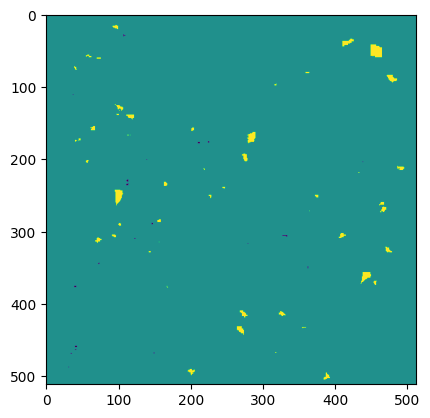

In [9]:
import matplotlib.pyplot as plt
plt.imshow(test[13,:,:])